In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
data = pd.read_csv(r"C:\Users\Fredrick.Alli\Documents\Visualise.csv")
data.head()


,Day,Date,Month-Year,Week,Total Call Centre Cases
0,Sun,01-Oct-23,Oct-23,40,437
1,Mon,02-Oct-23,Oct-23,40,162
2,Tue,03-Oct-23,Oct-23,40,211
3,Wed,04-Oct-23,Oct-23,40,273
4,Thu,05-Oct-23,Oct-23,40,305


In [15]:
data.dtypes

Day                        object
Date                       object
Month-Year                 object
Week                        int64
Total Call Centre Cases     int64
dtype: object

In [23]:
#To convert the date column in my dataframe to datetime format 
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')


In [24]:
#To check if date is now in datetime format
data.dtypes

Day                                object
Date                       datetime64[ns]
Month-Year                         object
Week                                int64
Total Call Centre Cases             int64
dtype: object

In [25]:
data.columns

Index(['Day', 'Date', 'Month-Year', 'Week', 'Total Call Centre Cases'], dtype='object')

In [28]:
data.describe()

,Date,Week,Total Call Centre Cases
count,92,92.000000,92.000000
mean,2023-11-15 12:00:00,46.076087,365.641304
min,2023-10-01 00:00:00,40.000000,162.000000
25%,2023-10-23 18:00:00,43.000000,235.000000
50%,2023-11-15 12:00:00,46.000000,288.500000
75%,2023-12-08 06:00:00,49.000000,477.750000
max,2023-12-31 00:00:00,53.000000,1066.000000
std,NaN,3.812166,181.951484


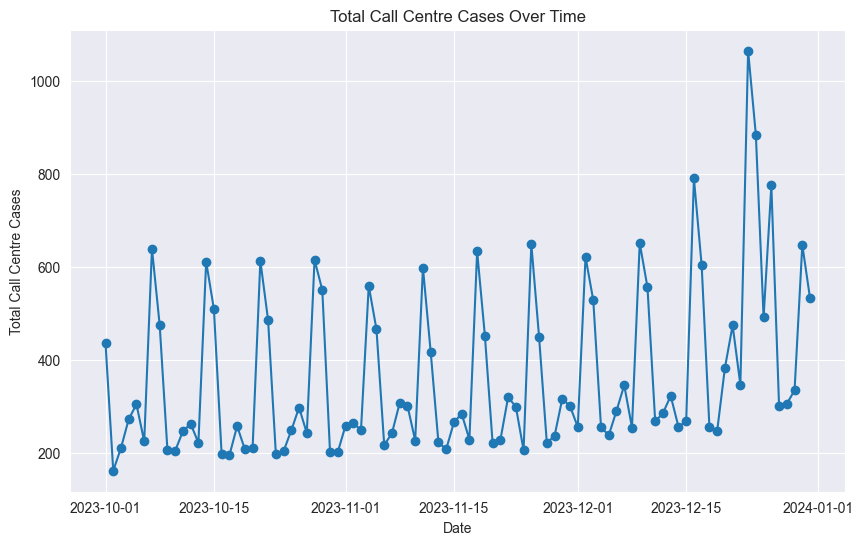

In [31]:

# data = pd.DataFrame({
#     'Day': ['Mon', 'Tue', 'Wed'],
#     'Date': pd.to_datetime(['2024-01-01', '2024-01-02', '2024-01-03']),
#     'Week': [1, 1, 1],
#     'Total Call Centre Cases': [100, 150, 200]
# })

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Total Call Centre Cases'], marker='o')  # Line chart

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Total Call Centre Cases')
plt.title('Total Call Centre Cases Over Time')

# Show plot
plt.show()

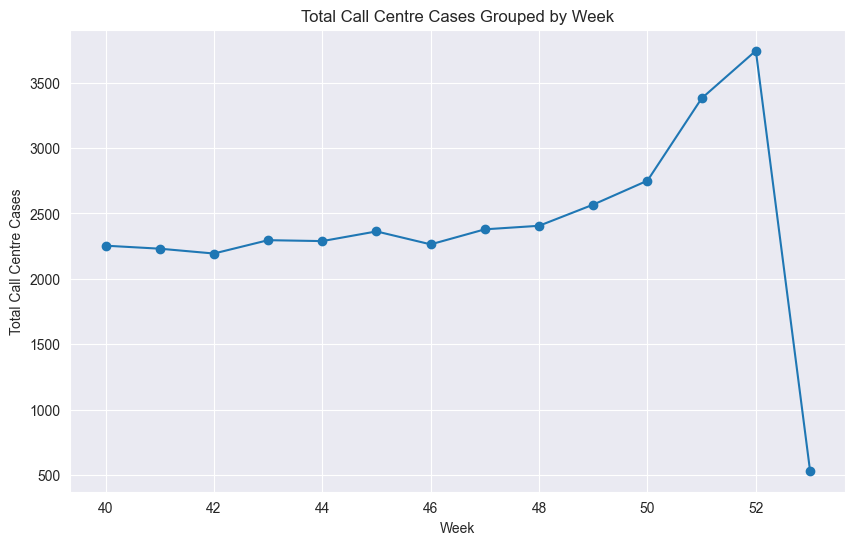

In [34]:

# Grouping data by 'Week' and summing up the 'Total Call Centre Cases'
weekly_data = data.groupby('Week')['Total Call Centre Cases'].sum().reset_index()

# Sorting the data by 'Week' to ensure it flows in a nice order
weekly_data = weekly_data.sort_values(by='Week')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Week'], weekly_data['Total Call Centre Cases'], marker='o')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Call Centre Cases')
plt.title('Total Call Centre Cases Grouped by Week')

# Show plot
plt.show()

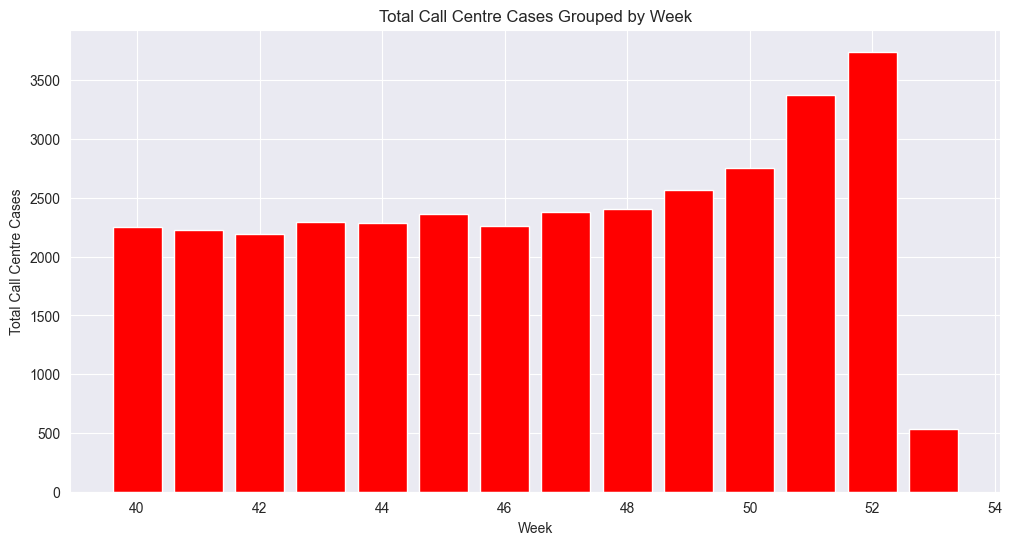

In [36]:
# Grouping data by 'Week' and summing up the 'Total Call Centre Cases'
weekly_data = data.groupby('Week')['Total Call Centre Cases'].sum().reset_index()

# Sorting the data by 'Week' to ensure it flows in a nice order
weekly_data = weekly_data.sort_values(by='Week')

# Creating a bar chart
plt.figure(figsize=(12, 6))
plt.bar(weekly_data['Week'], weekly_data['Total Call Centre Cases'], color='red')

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Call Centre Cases')
plt.title('Total Call Centre Cases Grouped by Week')

# Show plot
plt.show()

C:\Users\Fredrick.Alli\AppData\Local\Temp\ipykernel_13776\3546834583.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Week', 'Day'])['Total Call Centre Cases'].sum().unstack()


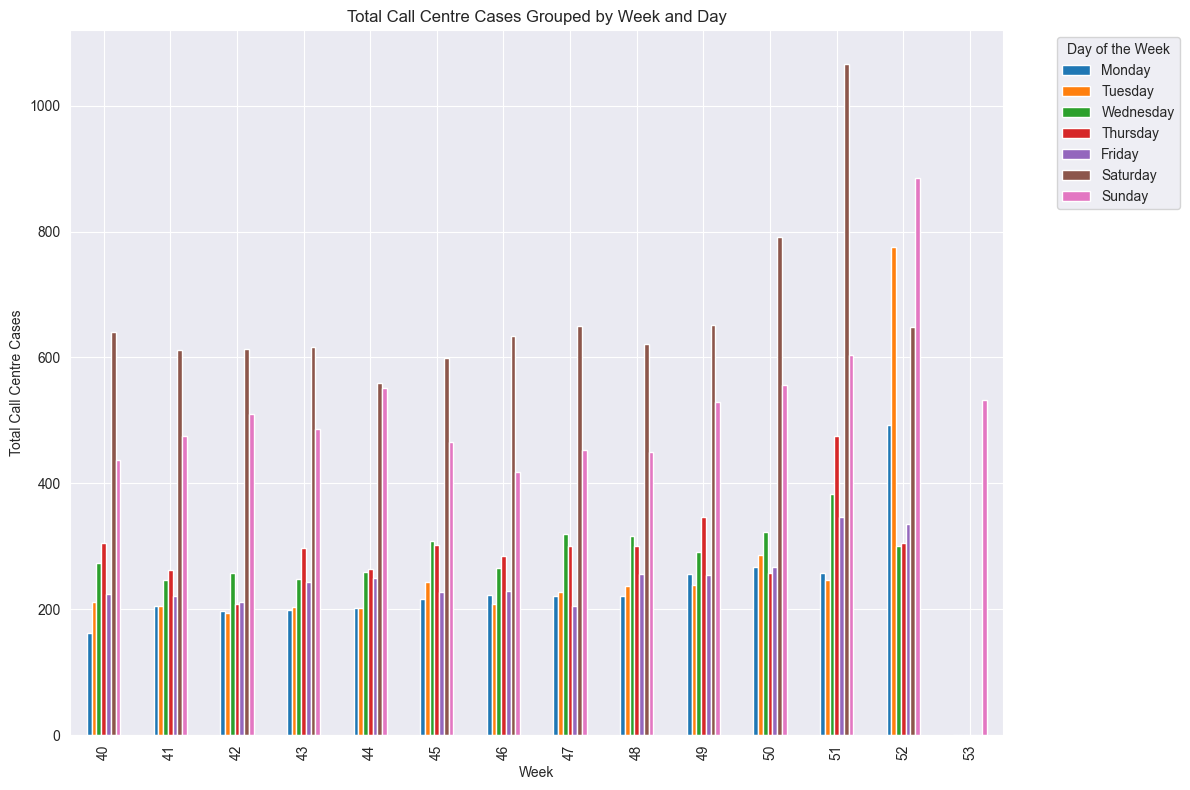

In [46]:
# Assuming 'data' is your DataFrame with columns 'Date', 'Week', and 'Total Call Centre Cases'

# Define the order for the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' into a categorical type with the specified order
data['Day'] = pd.Categorical(data['Day'], categories=days_order, ordered=True)

# Grouping data by 'Week' and 'Day', then summing up the 'Total Call Centre Cases'
grouped_data = data.groupby(['Week', 'Day'])['Total Call Centre Cases'].sum().unstack()

# Plotting
plt.figure(figsize=(12, 8))
grouped_data.plot(kind='bar', stacked=False, ax=plt.gca())

# Adding labels and title
plt.xlabel('Week')
plt.ylabel('Total Call Centre Cases')
plt.title('Total Call Centre Cases Grouped by Week and Day')

# Adjusting legend
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()

Heat Map 

C:\Users\Fredrick.Alli\AppData\Local\Temp\ipykernel_13776\4292021002.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(['Week', 'Day'])['Total Call Centre Cases'].sum().unstack()


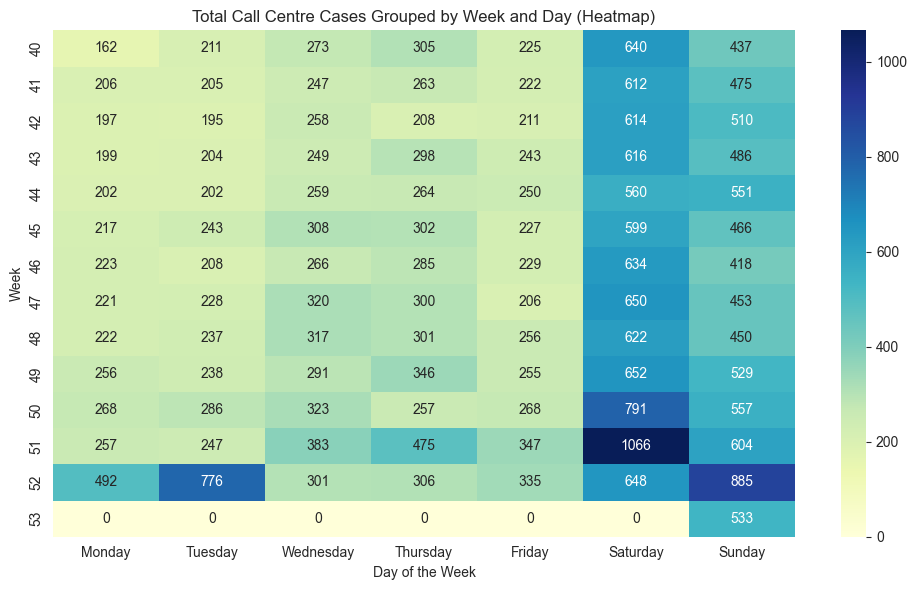

In [50]:
# Define the order for the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'Day' into a categorical type with the specified order
data['Day'] = pd.Categorical(data['Day'], categories=days_order, ordered=True)

# Grouping data by 'Week' and 'Day', then summing up the 'Total Call Centre Cases'
grouped_data = data.groupby(['Week', 'Day'])['Total Call Centre Cases'].sum().unstack()

# Plotting as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_data, cmap='YlGnBu', annot=True, fmt='d')

# Adding labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Week')
plt.title('Total Call Centre Cases Grouped by Week and Day (Heatmap)')

# Show plot
plt.tight_layout()
plt.show()

Counting Each Clinicians per day 

In [51]:
count = pd.read_csv(r"C:\Users\Fredrick.Alli\Documents\Count.csv")
count.head()

C:\Users\Fredrick.Alli\AppData\Local\Temp\ipykernel_13776\3746157399.py:1: DtypeWarning: Columns (0,1,2,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  count = pd.read_csv(r"C:\Users\Fredrick.Alli\Documents\Count.csv")


,Actual Date,Date,Day,Week,Duty Station,Start,End,Confirmed Person,Length of Shift
0,01/10/2023,01-Oct-23,Sun,40.0,Aston Bourne Road Base 1 (GP/AP/PCN) (CC),02:30:00,08:29:00,Martin (PCN) Corpuz,05:59:00
1,01/10/2023,01-Oct-23,Sun,40.0,Aston Bourne Road Base 1 (GP/AP/PCN) (CC),07:30:00,11:59:00,Kamleash Jaisswar (ANP),04:29:00
2,01/10/2023,01-Oct-23,Sun,40.0,Aston Bourne Road Base 1 (GP/AP/PCN) (CC),12:00:00,15:59:00,Noel Casamina,03:59:00
3,01/10/2023,01-Oct-23,Sun,40.0,Aston Bourne Road Base 1 (GP/AP/PCN) (CC),16:10:00,20:00:00,Atif Ghaffar,03:50:00
4,01/10/2023,01-Oct-23,Sun,40.0,Aston Bourne Road Base 1 (GP/AP/PCN) (CC),22:30:00,02:29:00,Aparna Yalamanchili,03:59:00


In [53]:
count.dtypes

Actual Date          object
Date                 object
Day                  object
Week                float64
Duty Station         object
Start                object
End                  object
Confirmed Person     object
Length of Shift      object
dtype: object

In [56]:
#To convert the date column in my dataframe to datetime format 
count['Actual Date'] = pd.to_datetime(count['Actual Date'],format='%d/%m/%Y')

In [57]:
count.columns

Index(['Actual Date', 'Date', 'Day', 'Week', 'Duty Station', 'Start', 'End',
       'Confirmed Person', 'Length of Shift'],
      dtype='object')

In [58]:
count.dtypes

Actual Date         datetime64[ns]
Date                        object
Day                         object
Week                       float64
Duty Station                object
Start                       object
End                         object
Confirmed Person            object
Length of Shift             object
dtype: object

To count for each clinicians per day 

In [60]:
# Drop duplicates based on 'Actual Date' and 'Confirmed Person'
unique_data = count.drop_duplicates(['Actual Date', 'Confirmed Person'])

# Group by 'Actual Date' and count the number of unique clinicians for each date
clinician_counts = unique_data.groupby('Actual Date')['Confirmed Person'].count()

# Now, 'clinician_counts' contains the count of unique clinicians for each 'Actual Date'
print(clinician_counts)

Actual Date
2023-10-01    27
2023-10-02    15
2023-10-03    16
2023-10-04    19
2023-10-05    18
              ..
2023-12-27    18
2023-12-28    19
2023-12-29    20
2023-12-30    35
2023-12-31    35
Name: Confirmed Person, Length: 92, dtype: int64


In [61]:
clinician_counts.head()

Actual Date
2023-10-01    27
2023-10-02    15
2023-10-03    16
2023-10-04    19
2023-10-05    18
Name: Confirmed Person, dtype: int64

In [63]:
# Display the entire DataFrame
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(clinician_counts)

Actual Date
2023-10-01    27
2023-10-02    15
2023-10-03    16
2023-10-04    19
2023-10-05    18
2023-10-06    15
2023-10-07    33
2023-10-08    28
2023-10-09    16
2023-10-10    15
2023-10-11    19
2023-10-12    18
2023-10-13    16
2023-10-14    29
2023-10-15    27
2023-10-16    14
2023-10-17    16
2023-10-18    19
2023-10-19    18
2023-10-20    18
2023-10-21    34
2023-10-22    27
2023-10-23    15
2023-10-24    16
2023-10-25    18
2023-10-26    19
2023-10-27    17
2023-10-28    32
2023-10-29    32
2023-10-30    15
2023-10-31    15
2023-11-01    17
2023-11-02    18
2023-11-03    17
2023-11-04    36
2023-11-05    31
2023-11-06    14
2023-11-07    16
2023-11-08    17
2023-11-09    20
2023-11-10    17
2023-11-11    30
2023-11-12    29
2023-11-13    15
2023-11-14    16
2023-11-15    17
2023-11-16    19
2023-11-17    19
2023-11-18    32
2023-11-19    31
2023-11-20    16
2023-11-21    17
2023-11-22    17
2023-11-23    18
2023-11-24    17
2023-11-25    31
2023-11-26    30
2023-11-27    15
20